# Machine Learning Final Project

## Bank default prediction

In general, a stable financial system is an important prerequisite for economic growth and stability. Banks play an essential role in the financial system of every country, and as highlighted by the global financial crisis, they can cause the global economic crisis. For example, Lehman Brothers bankruptcy filing was the largest in US history and considered to have played a decisive role in the unfolding of the financial crisis of 2007–2008. That is why supervisors and regulator authorities try to predict the probability of bank default to apply appropriate mikro or macroprudential policies.
The goal of this project to predict bank default using Machine Learning algorithms.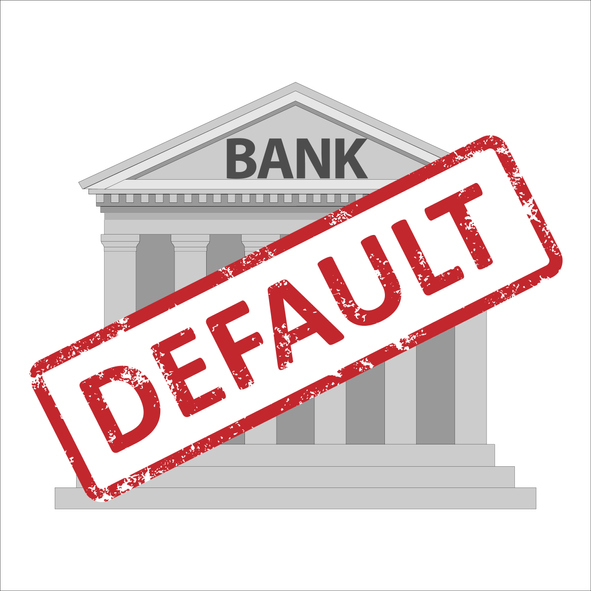

In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data 
df = pd.read_csv('C:\\Users\\Taguhi\\Desktop\\ML Individual\\data.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [3]:
df.shape

(6819, 96)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are no missing values in the dataset

### Feature selection

In [5]:
## Feature Statistics
feature_df = df.drop('Bankrupt?',axis = 1).describe().T
feature_df = feature_df.reset_index().rename(columns = {'index' : 'columns'})
feature_df['distinct_vals'] = feature_df['columns'].apply(lambda x : len(df[x].value_counts()))
feature_df['column_var'] = feature_df['columns'].apply(lambda x : np.var(df[x]))
feature_df['column_std'] = feature_df['columns'].apply(lambda x : np.std(df[x]))
feature_df['column_mean'] = feature_df['columns'].apply(lambda x : np.mean(df[x]))
feature_df['target_corr'] = feature_df['columns'].apply(lambda x : stats.pointbiserialr(df['Bankrupt?'], df[x])[0])
feature_df.head()


columns   count      mean  \
0   ROA(C) before interest and depreciation befor...  6819.0  0.505180   
1             ROA(A) before interest and % after tax  6819.0  0.558625   
2   ROA(B) before interest and depreciation after...  6819.0  0.553589   
3                             Operating Gross Margin  6819.0  0.607948   
4                        Realized Sales Gross Margin  6819.0  0.607929   

        std  min       25%       50%       75%  max  distinct_vals  \
0  0.060686  0.0  0.476527  0.502706  0.535563  1.0           3333   
1  0.065620  0.0  0.535543  0.559802  0.589157  1.0           3151   
2  0.061595  0.0  0.527277  0.552278  0.584105  1.0           3160   
3  0.016934  0.0  0.600445  0.605997  0.613914  1.0           3781   
4  0.016916  0.0  0.600434  0.605976  0.613842  1.0           3788   

   column_var  column_std  column_mean  target_corr  
0    0.003682    0.060681     0.505180    -0.260807  
1    0.004305    0.065615     0.558625    -0.282941  
2    0.003793    0.061590     0.553589    -0.273051  
3    0.000287    0.016933     0.607948    -0.100043  
4    0.000286    0.016915     0.607929    -0.099445

In [6]:
len(feature_df[feature_df['column_var'].astype(float) == 0.0])

1

In [7]:
feature_df[feature_df['column_var'].astype(float) == 0.0]

columns   count  mean  std  min  25%  50%  75%  max  \
93   Net Income Flag  6819.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0   

    distinct_vals  column_var  column_std  column_mean  target_corr  
93              1         0.0         0.0          1.0          NaN

In [8]:
df.drop(' Net Income Flag',axis = 1, inplace = True)

The Net Income Flag has constant values, so it is useless we will drop it.

### Variable Variance

In [9]:

feature_df = feature_df.sort_values('column_var', ascending = True)
feature_df['column_var'] = (feature_df['column_var'] - feature_df['column_var'].min()) / (feature_df['column_var'].max() - feature_df['column_var'].min())
trace1 = go.Scatter(x=feature_df['columns'], y=feature_df['column_var'], opacity=0.75, marker=dict(color="red"))
layout = dict(height=400, title='Feature Variance', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
py.iplot(fig);

One of the statistical intution is that if the feature variance is very less, then the feature will add less contribution to the model. We see that most of our features have quite low variance.

In [10]:
trace1 = go.Histogram(x=feature_df['target_corr'], opacity=0.45, marker=dict(color="red"))
layout = dict(height=400, title='Distribution of correlation with target', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
py.iplot(fig);

Also many features have almost 0 correlation with the target variable.

In [11]:
selected =feature_df[(feature_df.target_corr > 0.05) | (feature_df.target_corr < -0.05) & (feature_df.column_var > 0.00001)]
selected.shape

(16, 14)

In [12]:
trace1 = go.Histogram(x=selected['target_corr'], opacity=0.45, marker=dict(color="green"))
layout = dict(height=400, title='Distribution of correlation with target', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
py.iplot(fig);

In [13]:
df_selected=df[df.columns.intersection(selected['columns'])]
df_selected['default'] = df['Bankrupt?']
df_selected

Net Value Growth Rate   Debt ratio %   Borrowing dependency  \
0                   0.000327       0.207576               0.390284   
1                   0.000443       0.171176               0.376760   
2                   0.000396       0.207516               0.379093   
3                   0.000382       0.151465               0.379743   
4                   0.000439       0.106509               0.375025   
...                      ...            ...                    ...   
6814                0.000450       0.124618               0.373823   
6815                0.000445       0.099253               0.372505   
6816                0.000435       0.038939               0.369637   
6817                0.000529       0.086979               0.369649   
6818                0.000519       0.014149               0.370049   

       Contingent liabilities/Net worth  \
0                              0.006479   
1                              0.005835   
2                              0.006562   
3                              0.005366   
4                              0.006624   
...                                 ...   
6814                           0.005366   
6815                           0.008619   
6816                           0.005366   
6817                           0.007068   
6818                           0.006368   

       Inventory and accounts receivable/Net value  \
0                                         0.398036   
1                                         0.397725   
2                                         0.406580   
3                                         0.397925   
4                                         0.400079   
...                                            ...   
6814                                      0.404804   
6815                                      0.399926   
6816                                      0.395592   
6817                                      0.401540   
6818                                      0.393883   

       Fixed Assets Turnover Frequency   Cash/Current Liability  \
0                         1.165007e-04             1.473360e-04   
1                         7.190000e+08             1.383910e-03   
2                         2.650000e+09             5.340000e+09   
3                         9.150000e+09             1.010646e-03   
4                         2.935211e-04             6.804636e-04   
...                                ...                      ...   
6814                      1.429781e-04             5.071548e-03   
6815                      6.051982e-04             4.727181e-03   
6816                      1.024298e-03             8.821248e-02   
6817                      2.330013e-04             7.133218e-03   
6818                      2.995731e-04             6.667354e-02   

       Current Liability to Assets   Current Liabilities/Equity  \
0                         0.147308                     0.339077   
1                         0.056963                     0.329740   
2                         0.098162                     0.334777   
3                         0.098715                     0.331509   
4                         0.110195                     0.330726   
...                            ...                          ...   
6814                      0.103838                     0.330914   
6815                      0.089901                     0.329753   
6816                      0.024414                     0.326921   
6817                      0.083199                     0.329294   
6818                      0.018517                     0.326690   

       Total expense/Assets   Fixed Assets to Assets  \
0                  0.064856                 0.424206   
1                  0.025516                 0.468828   
2                  0.021387                 0.276179   
3                  0.024161                 0.559144   
4                  0.026385                 0.309555   
...                     ...                      ...  

### Correlation of variables

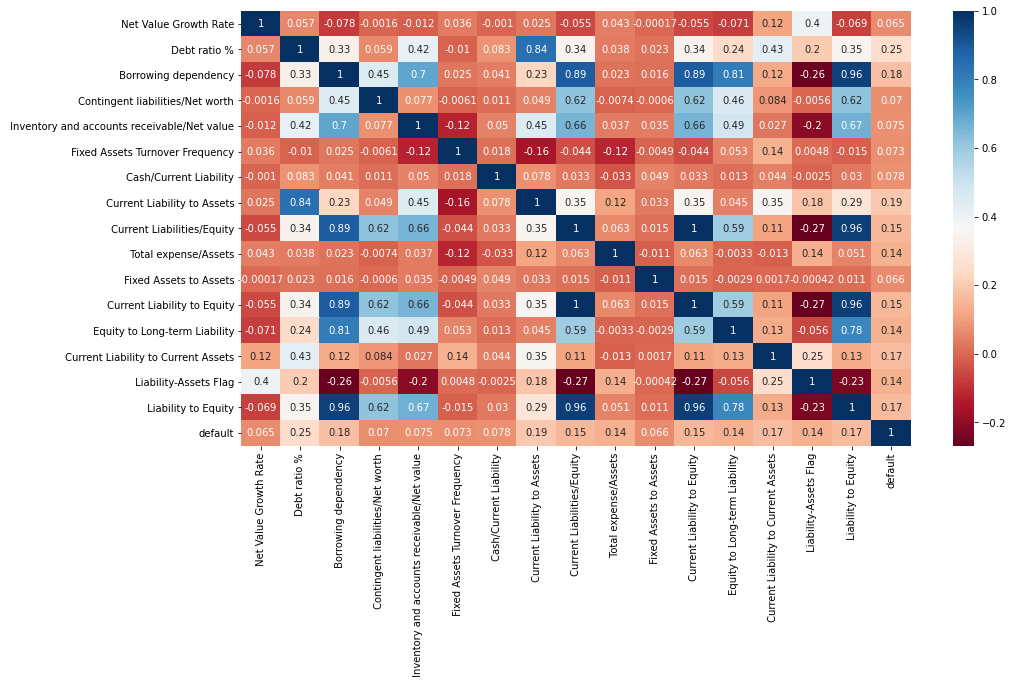

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df_selected.corr(), annot=True,cmap="RdBu")
plt.show()

 There are highly correlated columns such as Liability to Equity and Borrowing dependency, Equity to Long-term Liability and Borrowing dependency, Current Liability to Equity and Borrowing dependency, Borrowing dependency and Inventory and accounts receivable/Net value, Debt ratio % and Current Liability to Assets and so on. We will drop one of this columns.

In [15]:
df_selected.drop([' Borrowing dependency', 
                  ' Liability to Equity',' Current Liability to Assets',
                  ' Current Liabilities/Equity'], axis = 1, inplace = True)

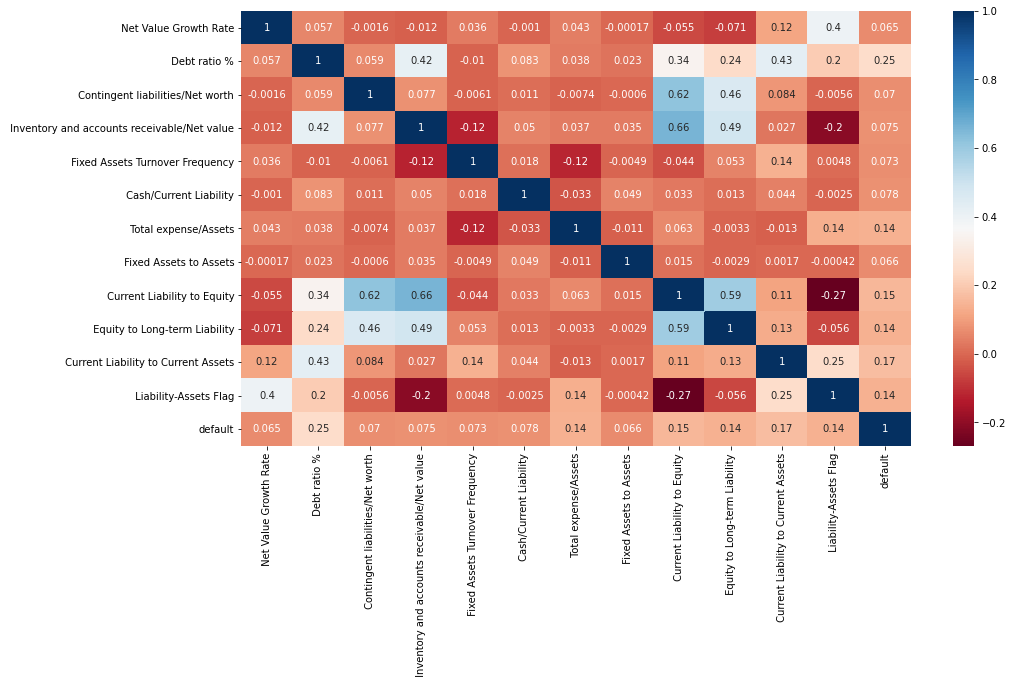

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df_selected.corr(), annot=True,cmap="RdBu")
plt.show()

In [17]:
# Description of the variables
feature_df = df_selected.drop('default',axis = 1).describe().T
feature_df = feature_df.reset_index().rename(columns = {'index' : 'columns'})
feature_df['distinct_vals'] = feature_df['columns'].apply(lambda x : len(df_selected[x].value_counts()))
feature_df['target_corr'] = feature_df['columns'].apply(lambda x : stats.pointbiserialr(df['Bankrupt?'], df[x])[0])
feature_df

columns   count          mean  \
0                          Net Value Growth Rate  6819.0  1.566212e+06   
1                                   Debt ratio %  6819.0  1.131771e-01   
2               Contingent liabilities/Net worth  6819.0  5.968277e-03   
3    Inventory and accounts receivable/Net value  6819.0  4.024593e-01   
4                Fixed Assets Turnover Frequency  6819.0  1.008596e+09   
5                         Cash/Current Liability  6819.0  3.715999e+07   
6                           Total expense/Assets  6819.0  2.918410e-02   
7                         Fixed Assets to Assets  6819.0  1.220121e+06   
8                    Current Liability to Equity  6819.0  3.314098e-01   
9                  Equity to Long-term Liability  6819.0  1.156447e-01   
10           Current Liability to Current Assets  6819.0  3.150637e-02   
11                         Liability-Assets Flag  6819.0  1.173193e-03   

             std  min       25%       50%       75%           max  \
0   1.141594e+08  0.0  0.000441  0.000462  0.000499  9.330000e+09   
1   5.392031e-02  0.0  0.072891  0.111407  0.148804  1.000000e+00   
2   1.218836e-02  0.0  0.005366  0.005366  0.005764  1.000000e+00   
3   1.332408e-02  0.0  0.397403  0.400131  0.404551  1.000000e+00   
4   2.477557e+09  0.0  0.000233  0.000593  0.003652  9.990000e+09   
5   5.103509e+08  0.0  0.001973  0.004904  0.012806  9.650000e+09   
6   2.714878e-02  0.0  0.014567  0.022674  0.035930  1.000000e+00   
7   1.007542e+08  0.0  0.085360  0.196881  0.372200  8.320000e+09   
8   1.348803e-02  0.0  0.328096  0.329685  0.332322  1.000000e+00   
9   1.952918e-02  0.0  0.110933  0.112340  0.117106  1.000000e+00   
10  3.084469e-02  0.0  0.018034  0.027597  0.038375  1.000000e+00   
11  3.423431e-02  0.0  0.000000  0.000000  0.000000  1.000000e+00   

    distinct_vals  target_corr  
0            4502     0.065329  
1            4208     0.250161  
2            1855     0.070455  
3            5289     0.075278  
4            2451     0.072818  
5            6816     0.077921  
6            6819     0.139049  
7            6814     0.066328  
8            6819     0.153828  
9            4251     0.139014  
10           6819     0.171306  
11              2     0.139212

In [18]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0    Net Value Growth Rate                        6819 non-null   float64
 1    Debt ratio %                                 6819 non-null   float64
 2    Contingent liabilities/Net worth             6819 non-null   float64
 3    Inventory and accounts receivable/Net value  6819 non-null   float64
 4    Fixed Assets Turnover Frequency              6819 non-null   float64
 5    Cash/Current Liability                       6819 non-null   float64
 6    Total expense/Assets                         6819 non-null   float64
 7    Fixed Assets to Assets                       6819 non-null   float64
 8    Current Liability to Equity                  6819 non-null   float64
 9    Equity to Long-term Liability                6819 non-null   f

In [19]:
# Changing types of target and categorical variables
df_selected.default = df_selected.default.astype("O")
df_selected[' Liability-Assets Flag'] = df_selected[' Liability-Assets Flag'].astype("O")

In [20]:
for column in df_selected.drop(["default",' Liability-Assets Flag'],axis =1).columns:
    fig=px.box(df_selected,  x='default', y=column)
    fig.show()


In [21]:
# columns = df_selected.columns[:-1]
# for name in columns:
#     Q1=df_selected[name].quantile(0.25)
#     Q3=df_selected[name].quantile(0.75)
#     IQR=Q3-Q1
#     Lower_Whisker = Q1 - 1.5 * IQR
#     Upper_Whisker = Q3 + 1.5 * IQR
#     df_selected = df_selected[df_selected[name]< Upper_Whisker]
#     df_selected = df_selected[df_selected[name]> Lower_Whisker]

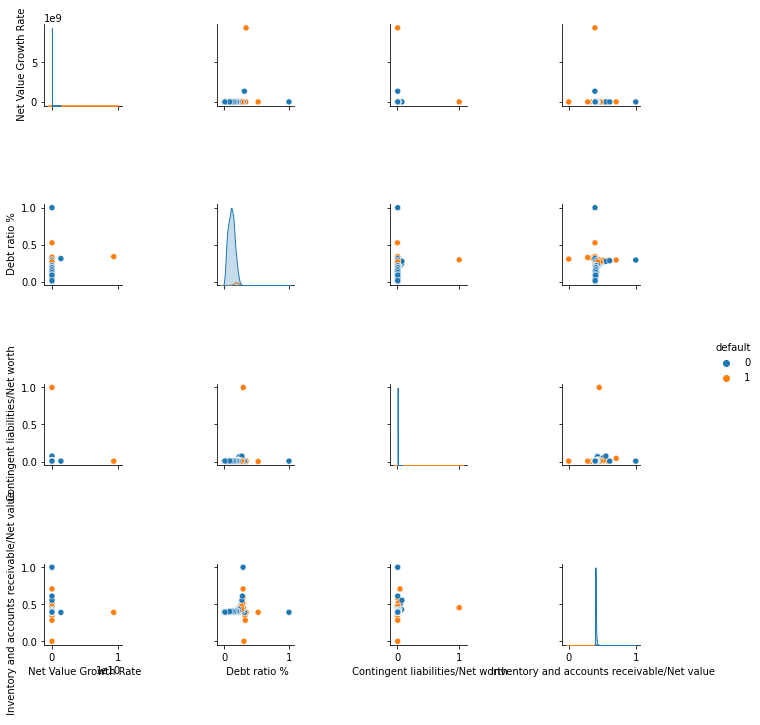

In [22]:
cols = df_selected.columns[:4]
sns.pairplot(df_selected, vars = cols, hue = 'default')

In [23]:
df_selected.columns

Index([' Net Value Growth Rate', ' Debt ratio %',
       ' Contingent liabilities/Net worth',
       ' Inventory and accounts receivable/Net value',
       ' Fixed Assets Turnover Frequency', ' Cash/Current Liability',
       ' Total expense/Assets', ' Fixed Assets to Assets',
       ' Current Liability to Equity', ' Equity to Long-term Liability',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       'default'],
      dtype='object')

### Iteraction of default and  Liability-Assets Flag

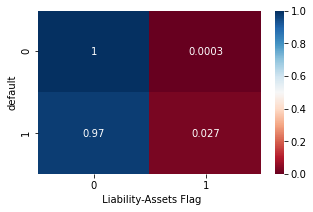

In [24]:
cross = pd.crosstab(df_selected['default'], df_selected[' Liability-Assets Flag']).apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize = (5, 3))
s = sns.heatmap(cross,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

If there is not flag bank is more likely not to go default, meanwhile when there is flag bank is more likely to go default.

#### Target variable distribution

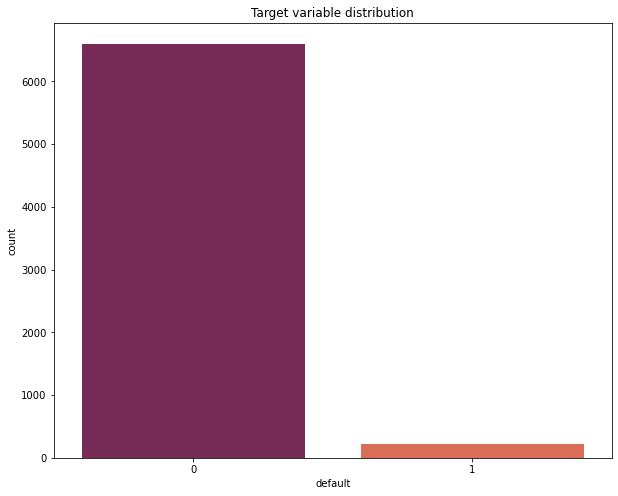

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df_selected.default, palette = "rocket")
plt.title("Target variable distribution")
plt.show()

In [26]:
# Target variable distribution by percentages
df_selected.default.value_counts(normalize=True).mul(100)

0    96.77372
1     3.22628
Name: default, dtype: float64

### Modeling


In [27]:
target = df_selected['default'].astype(int)
X = df_selected.drop(columns='default')
X = pd.get_dummies(X, columns=[' Liability-Assets Flag'])

In [28]:
train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)
train_x = StandardScaler().fit(train_x).transform(train_x)
test_x = StandardScaler().fit(test_x).transform(test_x)

print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 5114
 Test set: 1705


In [29]:
Logistic = LogisticRegression(random_state=42)
Knn = KNeighborsClassifier(n_neighbors=5)
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

from sklearn.svm import SVC
svc=SVC(C=100.0) 


In [30]:
def results(cls_list):
    indx = [ 'Acc_train', 'Acc_test', 'Sensitivity', 'Specificity']
    
    results = pd.DataFrame(index=indx, columns=['Logistic', 'Knn', 'RFC'])
    
    for i, cls in enumerate(cls_list):
        cls.fit(train_x,train_y)
        test_y_new = cls.predict(test_x)    
        train_y_new = cls.predict(train_x)
        acc_train = accuracy_score(train_y,train_y_new)
        acc_test = accuracy_score(test_y,test_y_new)
        sensitivity = recall_score(test_y,test_y_new)
        specificity = recall_score(test_y,test_y_new, pos_label =0)
        name = results.columns[i]
        results[name] = [acc_train, acc_test, sensitivity, specificity]
    return results
classifiers = [Logistic, Knn, RFC]
res = results(classifiers)

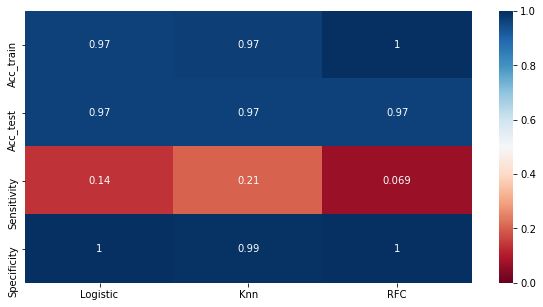

In [31]:
plt.figure(figsize = (10, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

There is obvious overfitting in the models

### Support Vector Machines Classifier

In [32]:
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(train_x,train_y)


# make predictions on test set
y_pred=svc.predict(test_x)


# compute and print accuracy score
print('Training set accuracy: {:.4f}'.format(svc.score(train_x, train_y)))

print('Test set accuracy: {:.4f}'.format(svc.score(test_x, test_y)))

Training set accuracy: 0.9797
Test set accuracy: 0.9625


In [33]:
cm = confusion_matrix(test_y, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))

Recall or Sensitivity : 0.9703
Specificity : 0.3636


### Down-sample Majority Class

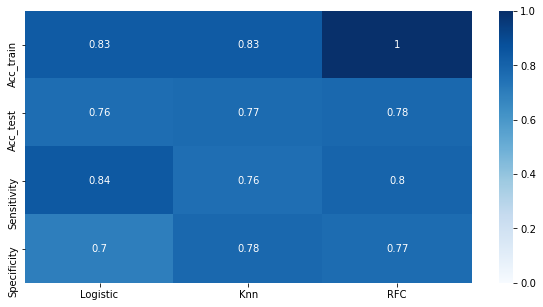

In [34]:
majority = df_selected[df_selected.default==0]
minority = df_selected[df_selected.default==1]
 

downsampled = resample(majority, 
                       replace=False,    
                       n_samples=220,     
                       random_state=42) 
 

downsampled = pd.concat([downsampled, minority])
 
target = downsampled['default'].astype(int)
X = downsampled.drop(columns='default')

train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)
train_x = StandardScaler().fit(train_x).transform(train_x)
test_x = StandardScaler().fit(test_x).transform(test_x)

res = results(classifiers)
plt.figure(figsize = (10, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'Blues',
               vmin = 0, 
               vmax = 1)

### Upsample Minority Only On Train Set

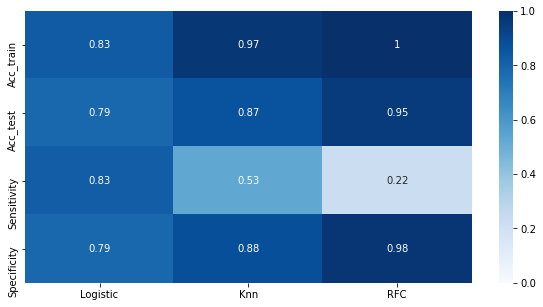

In [35]:
target = df_selected['default'].astype(int)
X = df_selected.drop(columns='default')

train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)
train = pd.concat([train_x, train_y],  axis = 1)
majority = train[train.default==0]
minority = train[train.default==1]
upsampled2 = resample(minority, 
                     replace=True,     
                     n_samples=2141,    
                     random_state=42) 
 

upsampled2 = pd.concat([majority,upsampled2])


train_y = upsampled2['default'].astype(int)
train_x = upsampled2.drop(columns='default')
train_x = StandardScaler().fit(train_x).transform(train_x)
test_x = StandardScaler().fit(test_x).transform(test_x)
res = results(classifiers)

plt.figure(figsize = (10, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'Blues',
               vmin = 0, 
               vmax = 1)

The best result was from logistic regression with downsampling.